WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta_group1, beta_group2, alpha_group1, alpha_group2]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 15 seconds.


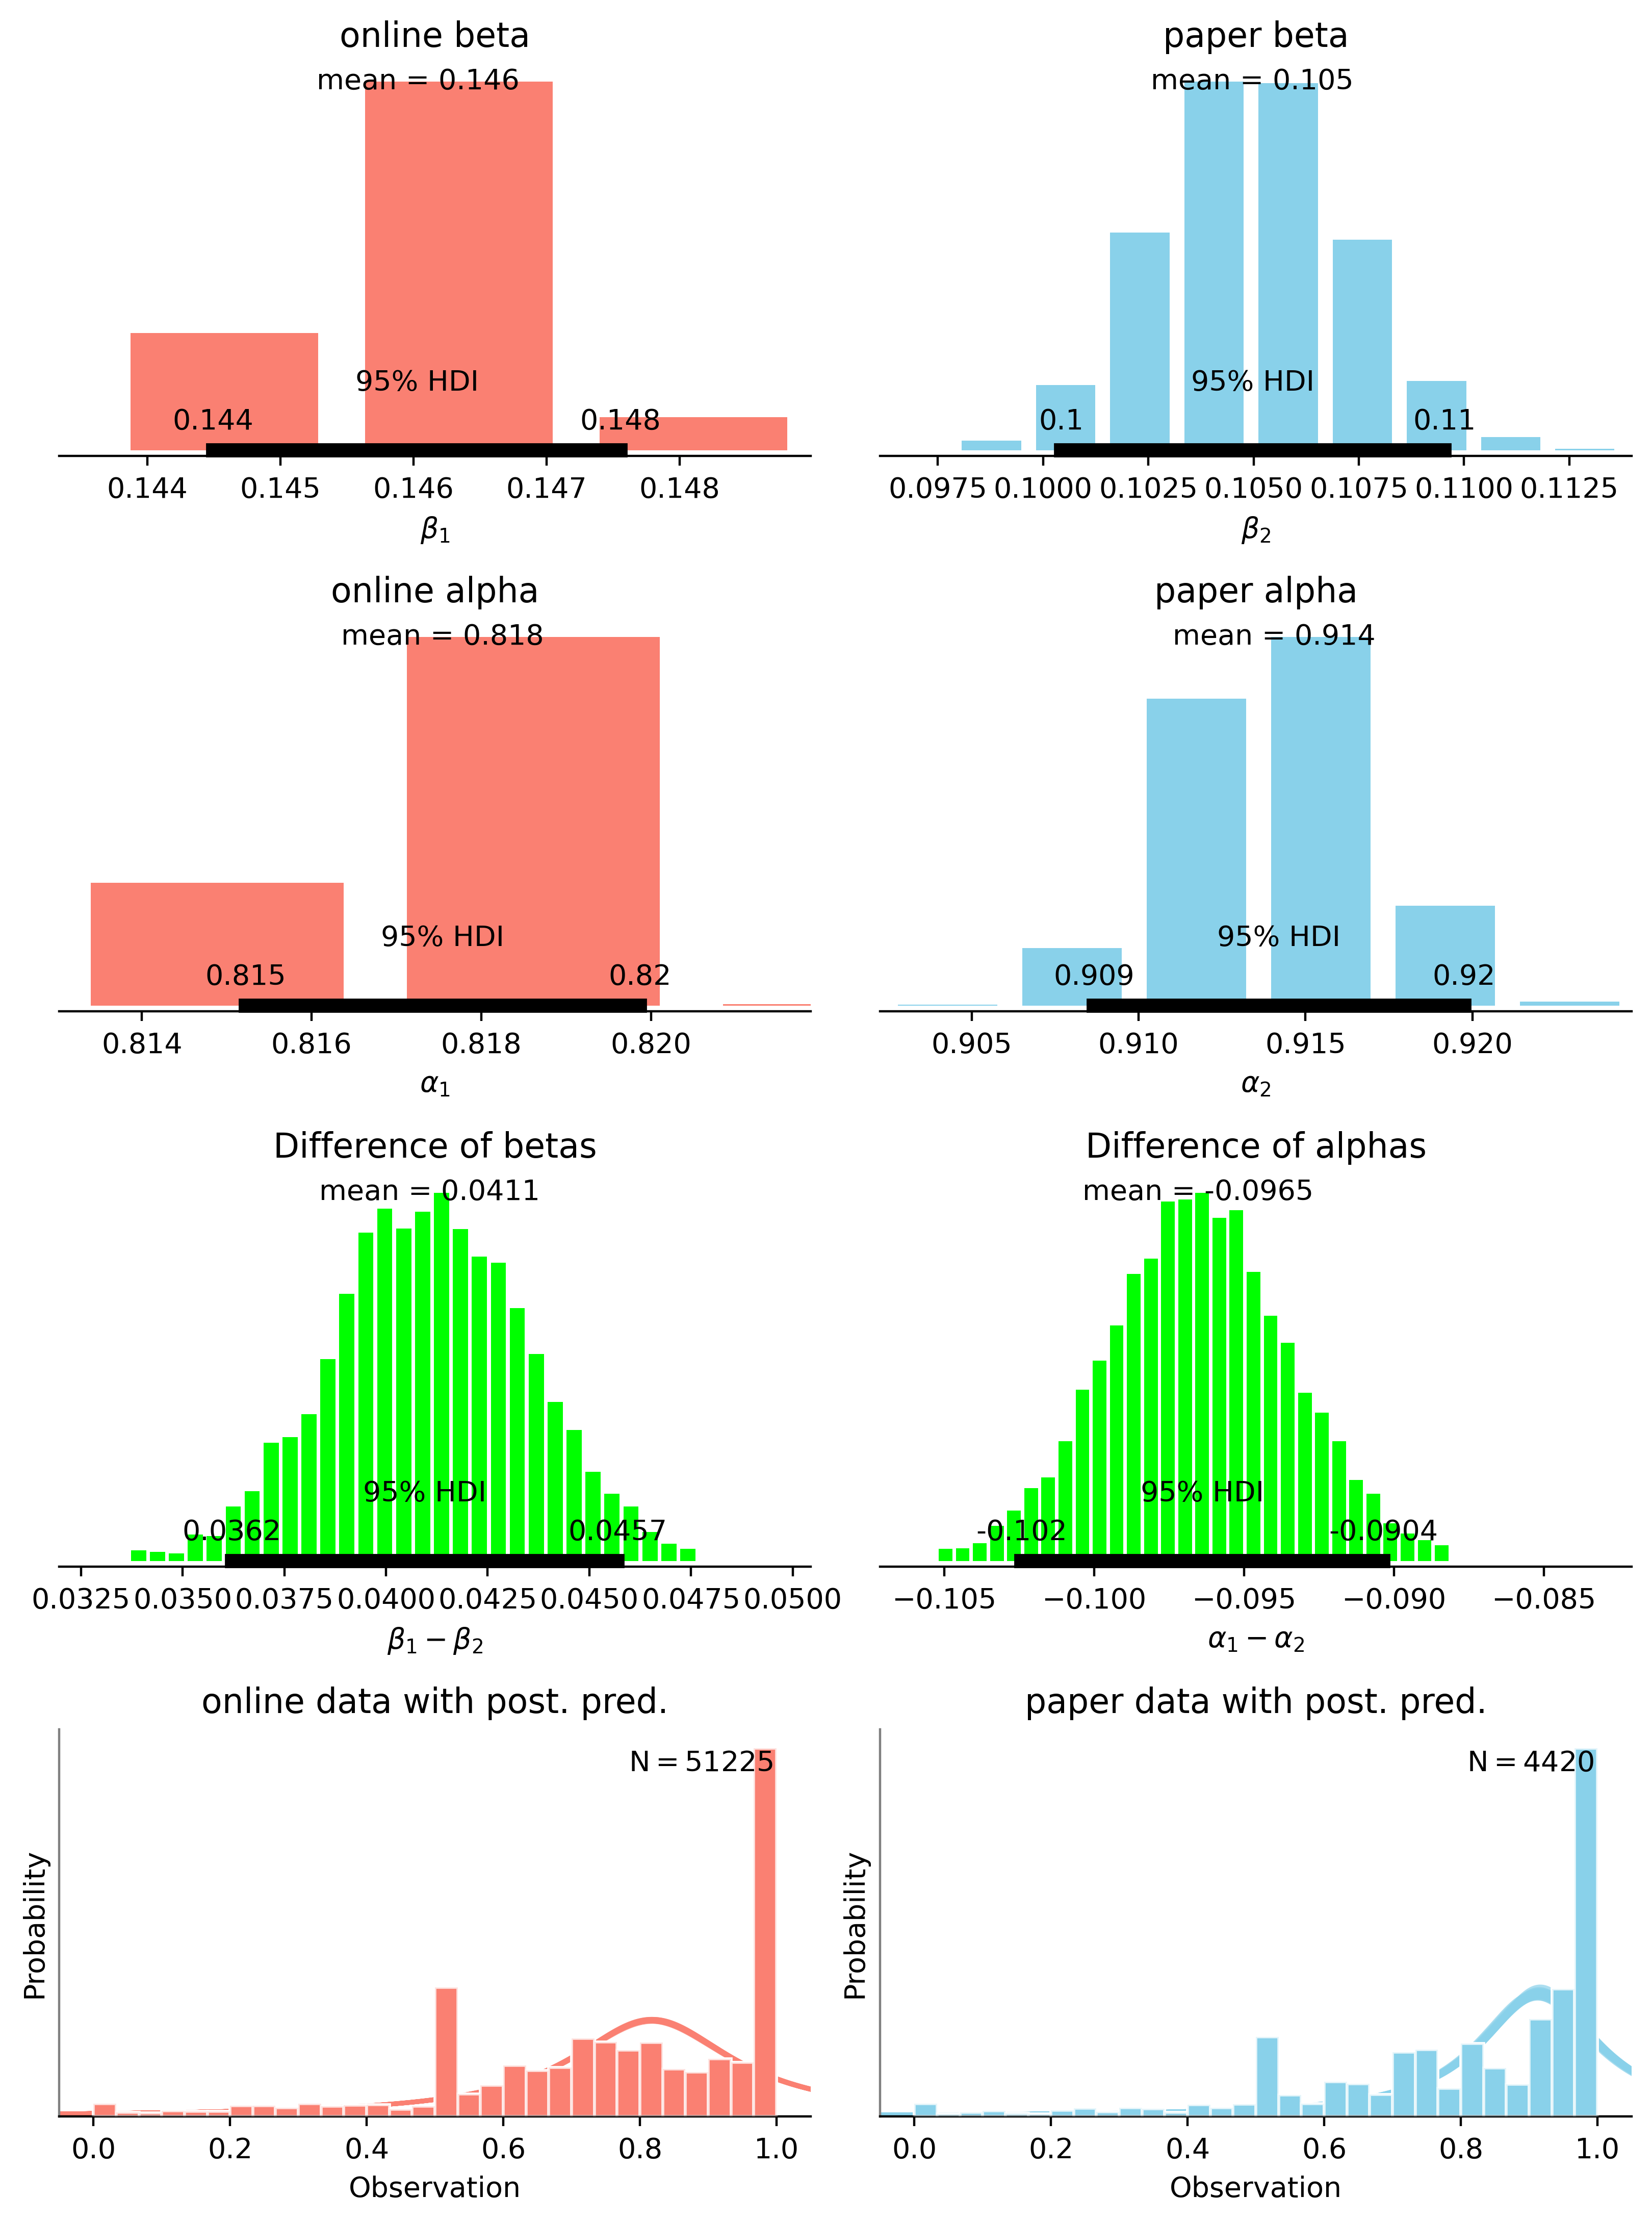

In [1]:
from bayes_test import BayesianHypothesisTestCauchy
import pandas as pd
import numpy as np

draws = 2000

online = np.load('online_distinctiveness.npy')

paper = np.load('paper_distinctiveness.npy')


df1 = pd.DataFrame({'value' : paper})
df2 = pd.DataFrame({'value' : online})
df1['del_type'] = 'paper'
df2['del_type'] = 'online'

df = pd.concat([df1,df2])

study_test = BayesianHypothesisTestCauchy(df=df,
                                   group1_name='online',
                                   group2_name='paper',
                                   value_column='value',
                                   category_column='del_type')
study_test.run_model(draws)
study_test.plot_results()

In [2]:
study_test.cliff_delta()
study_test.non_overlap_effect_size()
study_test.divergence_effect_size()
study_test.value_storage

Sampling: [Group 1 data, Group 2 data]


{'beta_group1': {'mean': 0.14603498506770896,
  'hdi_min': 0.14449624152258597,
  'hdi_max': 0.14755512269726606},
 'beta_group2': {'mean': 0.10496977832448166,
  'hdi_min': 0.10043106030731211,
  'hdi_max': 0.10952953498666392},
 'alpha_group1': {'mean': 0.8175413329613015,
  'hdi_min': 0.8152220796603342,
  'hdi_max': 0.8198702832090761},
 'alpha_group2': {'mean': 0.9140662078953281,
  'hdi_min': 0.9086589189308429,
  'hdi_max': 0.9197526496415769},
 'diff_beta': {'mean': 0.04106738704492519,
  'hdi_min': 0.03621165881238378,
  'hdi_max': 0.045695885003186845},
 'diff_alpha': {'mean': -0.09653149258910543,
  'hdi_min': -0.10242608934660746,
  'hdi_max': -0.09035404874112374},
 'cliff_delta': {'cliff_delta': 0.6141985972},
 'non_overlap_effect_size': {'non_overlap_effect_size': 0.9877000000000002},
 'divergent_effect_size': {'divergent_effect_size': 47027.55703282181}}

In [4]:
study_test.posterior_prob('diff_beta', low=0.04)

0.664375